Consider a set of ten numbers [49, 36, 20, 20, 53, 33, 66, 56, 61, 70] .
The MEAN is 46.4 .
Let's explore the subsets of this set of ten numbers. What size subsets would you like to consider? Enter the number below.
The desired sample size is 8
Now, the mean of the sample means of all samples of size 8 is 46.4 .
Compare this with the mean of the given set above (i.e. the population mean).
Notice that these two means are equal. This illustrates that the mean of all sample means (of samples of the same size) is equal to the population mean.
Also recall that the sampling means has an approximate normal distribution with the symmetrical axis at the said mean.
The histogram below for the samples calculated above illustrates this point.


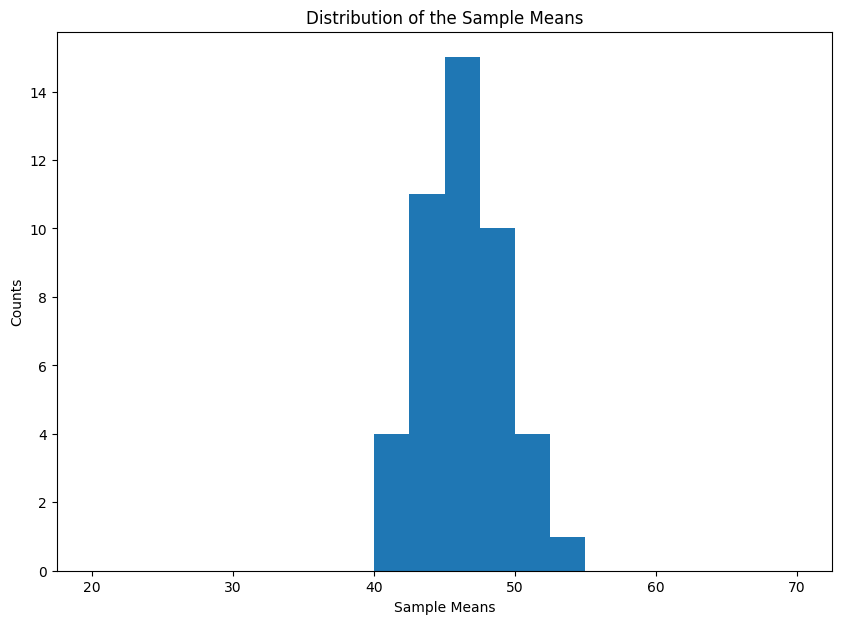

In [4]:
import random
from numpy import mean
from matplotlib import pyplot as plt
import numpy as np

##We begin by (randomly) generating a set of 10 numbers to serve as the population data points. UNCOMMENT THIS TO GENERATE A RANDOM LIST.
randomlist = []
for i in range(0,10): ##THE 10 IS THE NUMBER OF NUMBERS IN THE LIST. CHANGE IT AS YOU WISH.
        n = random.randint(20,70) ##THE 20 AND 70 MEANS THAT THE NUMBERS YOU GENERATED WILL FALL WITHIN THE RANGE 20 TO 70. 
        randomlist.append(n)

##You may also enter the numbers of your choice. COMMENT THIS OUT TO USE THE RANDOM LIST GENERATOR ABOVE.
# randomlist = [54, 21, 65, 63, 63, 30, 35, 58, 63, 62]

print("Consider a set of ten numbers",randomlist,".")
mu=mean(randomlist)
print('The MEAN is',mu,".")
print("Let's explore the subsets of this set of ten numbers. What size subsets would you like to consider? Enter the number below.")

#Specify the sample size of interest.
SIZE = 8 ##THIS IS USED BECAUSE JUPYTERLITE CAN'T SEEM TO PROCESS USER INPUT
# SIZE = int(input('Enter the desired sample size: ')) ##UNCOMMENT AND USE THIS TO PROMPT USER TO INPUT DESIRED SAMPLE SIZE
print("The desired sample size is",SIZE)

#We now wanna generate subsets of size SIZE. We begin with generating the characteristic functions, represented by strings of length 10.
#The strings are generated as the complete binary tree of height 10.
i=0
x = [[0],[1]]
while i<9:
    x=[y+[0] for y in x]+[y+[1] for y in x]
    i=i+1
# print("All binary strings of length",i+1,"are",x) ##UNCOMMENT THIS IF YOU WISH TO SEE THE COMPLETE BINARY TREE OF LEVEL i+1

#The collection of characteristic functions for the subsets of our desired length will be called chi.
chi = []
j=0
while j<2**10:
    if sum(x[j])==SIZE:
        chi.append(x[j])
    j=j+1
#print(chi)

#The function st(n) below returns the empty set when it sees a 0 in the characteristic position, where it returns the number
#in the randomlist when it sees a 1 in the characteristic position. This function will be used to generate the desired subsets in the next routine.
def st(n):
    if string[n]==0:
        return []
    else:
        return [randomlist[n]]

#We are now ready to generate the subsets of desired size.
#Let's compute the averages of the subsets.
#We also form the collection of those averages at the end of the routine.
#print("The subsets of size",SIZE,"are as follow:") ##UNCOMMENT THIS IS YOU WISH TO MAKE THE NEXT PRINTS
k=0
theaves = []
while k<len(chi):
    string=chi[k]
    n=0
    subset=[]
    while n<10:
        subset=subset+st(n)
        n=n+1
    # print(subset) ##UNCOMMENT THIS IS YOU WISH TO SEE THE SUBSETS OF THE DESIRED SIZE (AT EACH STEP OF THE RECURSION)
    # print("The average of the numbers in the subset is",mean(subset),".") ##UNCOMMENT THIS IS YOU WISH TO SEE THE MEAN OF THE SUBSET AT THIS STEP
    theaves.append(mean(subset))
    k=k+1
# print("The collection of averages is",theaves,".") ##UNCOMMENT THIS IS YOU WISH TO SEE THE COLLECTION OF SAMPLE AVERAGES (AVERAGES FROM THE SUBSETS)

print("Now, the mean of the sample means of all samples of size",SIZE,"is",mean(theaves),".")
print("Compare this with the mean of the given set above (i.e. the population mean).")
print("Notice that these two means are equal. This illustrates that the mean of all sample means (of samples of the same size) is equal to the population mean.")
print("Also recall that the sampling means has an approximate normal distribution with the symmetrical axis at the said mean.")
print("The histogram below for the samples calculated above illustrates this point.")

# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
# ax.hist(theaves, bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
ax.hist(theaves, bins = [20, 22.5, 25, 27.5, 30, 32.5, 35, 37.5, 40, 42.5, 45, 47.5, 50, 52.5, 55, 57.5, 60, 62.5, 65, 67.5, 70])

plt.xlabel("Sample Means")
plt.ylabel("Counts")
#plt.legend(legend)
plt.title('Distribution of the Sample Means')
 
# Show plot
plt.show()
